In [1]:
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
data = json.load(open('dat/email-eu.json','r'))

In [3]:
node_list = sorted([int(node)-1 for node in data['node-data']])

In [4]:
group_list = []
for _,group in data['edge-dict'].items():
    relabeled_group = tuple(sorted([int(node)-1 for node in group]))
    group_list.append(relabeled_group)

In [5]:
group_dict = defaultdict(int)
for group in group_list:
    group_dict[group] += 1

In [6]:
groups = []
weights = []
for group,weight in group_dict.items():
    groups.append(list(group))
    weights.append(weight)

Text(0.5, 0, 'Number of email (weight)')

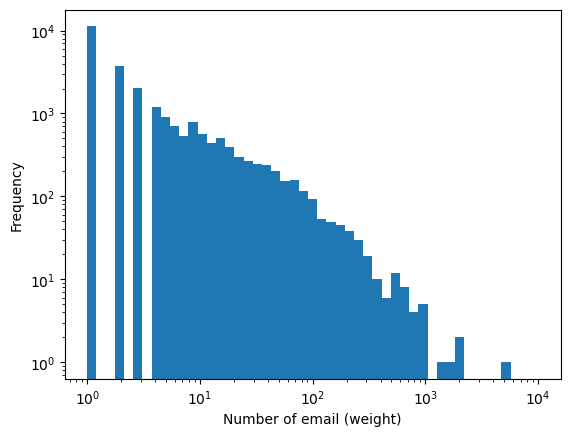

In [13]:
plt.hist(weights,bins=np.logspace(0,4))
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Number of email (weight)')

In [8]:
edge_list = []
for i,group in enumerate(groups):
    for node in group:
        edge_list.append([node,i])

### Save formatted data

In [9]:
form_data = {'node_list':node_list,'edge_list':edge_list,'weights':weights,'groups':groups}

In [10]:
json.dump(form_data,open('./dat/email-eu_form.json','w'))